## SYRIA TEL CUSTOMER CHURN

Name: KARIMI JAMES MBETI

Student Pace: FULL TIME

<img src="pictures/telecom.jpg" />

### Business Overview

The company would like to investigate the churn rates to impact decisions on products being offered to the clients and more so decisions on client-based products. Churn rates will also indicate our growth potential and also see the amount of revenue lost due to the unsubscriptions. 

According to forbes, it takes a lot more money (up to five times more) to get new customers than to keep the ones you already have. Churn tells us how many existing customers are leaving the business, so lowering churn will have a big positive impact on our revenue streams.

#### Business Problem

The company plans to increase it's revenues through customer retention as we've seen it's cheaper to retain a customer you already have. 

Having this in mind the company wants to learn its clients' patterns and manage to make predictions on customers who are likely to churn for further engagements to be done through tailoring the products enabling the company retain the client and try to maximize it's revenues.

#### Objectives

The main objective of this study is to predict churn. Hence the use of machine learning models.

The impact of churn rate is clear and predicting churn would be a good way create proactive marketing campaigns targeted to customers about to churn and also understand customer pain points which would help us improve our products.

### Data Understanding

In this study I used data from kaggle on a churn in a telecom's dataset. The dataset has exhaustive features on customer's subscriptions and also their average use in terms of spending and time.

### Data Preparation

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, precision_score,\
    recall_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

plt.style.use("fivethirtyeight")

In [2]:
# Viewing the data
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Checking the shape of the data
print(f"Our data has {df.shape[0]} rows and {df.shape[1]} columns.")

Our data has 3333 rows and 21 columns.


In [4]:
# Getting a feel of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

* From the data we see that we have no null values although we see data types objects which we'll need to convert to numeric due to fitting of our model.

In [5]:
# Confirming there are no null values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [6]:
# Checking for duplicates
df.duplicated().sum()

0

* We have no duplicated rows

### EDA

In [7]:
# A summary of our data
df.groupby("churn").describe()

account length                                                        \
               count        mean       std  min   25%    50%    75%    max   
churn                                                                        
False         2850.0  100.793684  39.88235  1.0  73.0  100.0  127.0  243.0   
True           483.0  102.664596  39.46782  1.0  76.0  103.0  127.0  225.0   

      area code              ... total intl charge       \
          count        mean  ...               75%  max   
churn                        ...                          
False    2850.0  437.074737  ...              3.24  5.1   
True      483.0  437.817805  ...              3.46  5.4   

      customer service calls                                               
                       count      mean       std  min  25%  50%  75%  max  
churn                                                                      
False                 2850.0  1.449825  1.163883  0.0  1.0  1.0  2.0  8.0  
True                   483.0  2.229814  1.853275  0.0  1.0  2.0  4.0  9.0  

[2 rows x 128 columns]

The visual below shows the churn rates

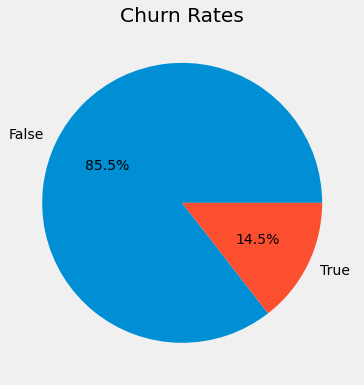

In [8]:
# a pie chart of the churn distribution
churn_rates = df.churn.value_counts(normalize=True)
plt.figure(figsize=(6,6))
plt.pie(churn_rates, labels=churn_rates.index, autopct="%1.1f%%")
plt.title("Churn Rates");

* From the above pie chart we see that 14.5% of our clients have churned. We seek to lower this number.

* From this we note also that there is a class imbalance when it comes to fitting our model.

In the next visual i'll inspect when customers are more likely to churn. Is it those below three months old or above three months.

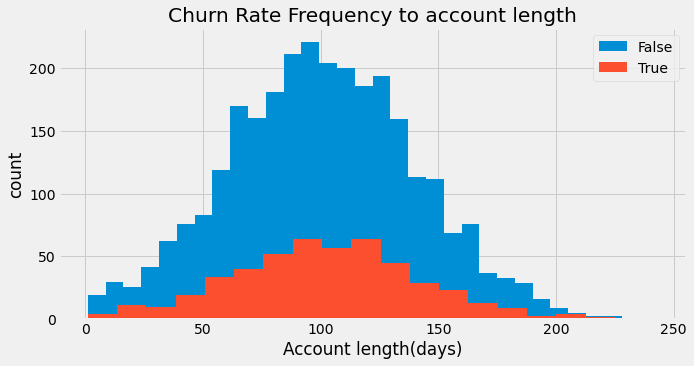

In [9]:
#r = df.groupby(["account length", "churn"]).size().reset_index()
#r = r.rename(columns={0: "count"})
#px.histogram(r, x="account length", y="count", color="churn")

plt.figure(figsize=(10,5))
df.groupby("churn")["account length"].hist(bins="auto")
plt.xlabel("Account length(days)")
plt.ylabel("count")
plt.title("Churn Rate Frequency to account length")
plt.legend(["False", "True"]);

* From the above visual we see that most of our customers have been with us for around 3 to 4 months thereabout and still customers at that stage are the customers most likely to churn

Next i'll visualize a plot to investigate whether those customers who make most customer service calls are likely to churn

In [10]:
def make_df(feature):
    """A simple function that takes in a column and creates a df to be used for visualizing"""
    s_df = df.groupby([feature, "churn"]).size().reset_index()
    s_df = s_df.rename(columns={0: "count"})
    return s_df

In [11]:
# A plot of Churn Distribution by Customer Service Calls
cs_df = make_df("customer service calls")
px.histogram(cs_df, x="customer service calls", y="count", color="churn",
             title="Churn Distribution by Customer Service Calls")

* From the above visual we note that the ratio of the customers making more than 4 calls to the customer service are likely to churn but also we see quite a number churning even without making a call just incase they experienced a challenge.

In the next cell i'll do some ```feature engineering``` to create another feature "total charges" which sums up all the charges made on the customer. With this i'll visualize in what range of charges are customers more likely to churn.

In [12]:
# Creating a new column of the total customer charges
df["total charges"] = df["total day charge"]\
    + df["total night charge"]\
    + df["total intl charge"]\
    + df["total eve charge"]

# Grouping the charges into categories
df["charges level"] = pd.qcut(df["total charges"], q=3, labels=["low", "medium", "high"])

In [13]:
# Visualizing Churn rate Distribution by Total Charges
charges_df = make_df("charges level")
px.bar(charges_df, x="charges level", y="count", color="churn", barmode="group",
       title="Churn rate Distribution by Total Charges")

* From the above visual we note that the higher the charges the higher the probability of the customer churning.

In the next cell i'll inspect a visual of the states with over 10 churned customers

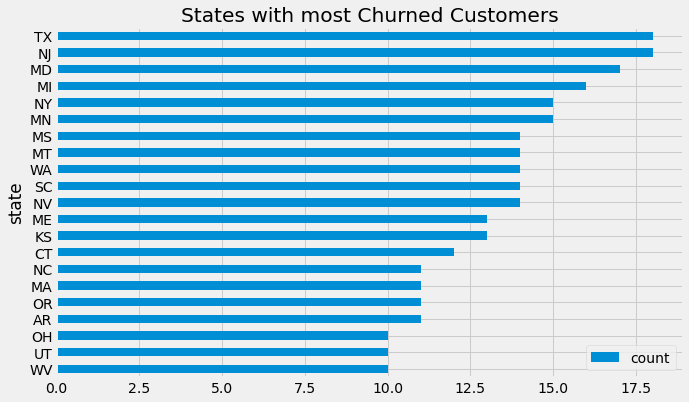

In [14]:
states_df = make_df("state")
states_df = states_df[states_df["churn"] == True].sort_values("count")

fig, ax = plt.subplots(figsize=(10,6))
states_df[states_df["count"] >= 10].plot.barh(x="state", y="count", ax=ax)
plt.title("States with most Churned Customers");

* From the above visual we see Texas and New Jersey are the states leading with the most churned customers.

#### Feature Selection

In this section i'll be eliminating features I fill aren't important.

From the dataset i'll drop _areacode_ and _phone number_ features which I feel won't have much impact in our model.

In [15]:
# Dropping irrelevant columns
df.drop(["area code", "phone number"], axis=1, inplace=True)

I'll then move on to check if there is correlation between my predictors so as to eliminate multicollinearity.

In [16]:
# Inspecting multicollinearity
corr_df = df.drop("churn", axis=1).corr().abs().stack().reset_index()\
    .sort_values(0, ascending=False)
corr_df["pairs"] = list(zip(corr_df.level_0, corr_df.level_1))
corr_df.set_index("pairs", inplace=True)
corr_df.drop(["level_0", "level_1"], axis=1, inplace=True)
corr_df.columns = ["coef"]
corr_df[corr_df["coef"] >= 0.75].drop_duplicates()

,coef
pairs,
"(account length, account length)",1.000000
"(total day minutes, total day charge)",1.000000
"(total eve minutes, total eve charge)",1.000000
"(total night charge, total night minutes)",0.999999
"(total intl charge, total intl minutes)",0.999993
"(total day charge, total charges)",0.884757
"(total charges, total day minutes)",0.884754


* We see that there is high multicollinearirty in the above features. we see that most of the collinearity comes from total charges and minutes and so i'll ```feature engineer``` charges per minute for every feature to minimize the collinearity and drop the other columns.

In [17]:
# creating new features
df["day charge per minute"] = df["total day charge"] / df["total day minutes"]
df["eve charge per minute"] = df["total eve charge"] / df["total eve minutes"]
df["night charge per minute"] = df["total night charge"] / df["total night minutes"]
df["intl charge per minute"] = df["total intl charge"] / df["total intl minutes"]

# dropping columns that were highly correlated
to_drop = ["total day charge", "total day minutes", "total eve charge",
           "total eve minutes", "total night charge", "total night minutes",
           "total intl charge", "total intl minutes"]
df.drop(to_drop, axis=1, inplace=True)

In [18]:
#Checking for null values
df.isna().sum()

state                       0
account length              0
international plan          0
voice mail plan             0
number vmail messages       0
total day calls             0
total eve calls             0
total night calls           0
total intl calls            0
customer service calls      0
churn                       0
total charges               0
charges level               0
day charge per minute       2
eve charge per minute       1
night charge per minute     0
intl charge per minute     18
dtype: int64

* After creating the new features above we had features with 0 minutes and so 0 charges. The division resulted in null values and so i'll fill the null values with 0s

In [19]:
# Filling null values with 0s
new_df = df.replace(np.nan, 0)

### Data Preprocessing

Before we can jump into modelling our data still has data in object categories and so i'll do some one hot encoding before moving on to fitting our model

In [20]:
cat_df = new_df.select_dtypes(exclude="number")
for col in cat_df.columns:
    print(col, "\n", cat_df[col].unique(), "\n")

state 
 ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND'] 

international plan 
 ['no' 'yes'] 

voice mail plan 
 ['yes' 'no'] 

churn 
 [False  True] 

charges level 
 ['high', 'medium', 'low']
Categories (3, object): ['low' < 'medium' < 'high'] 



In [21]:
# oneHotencoding
df = pd.get_dummies(new_df, columns=["state", "charges level"], dtype=int)
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day calls,total eve calls,total night calls,total intl calls,customer service calls,churn,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,charges level_low,charges level_medium,charges level_high
0,128,no,yes,25,110,99,91,3,1,False,...,0,0,0,0,0,0,0,0,0,1
1,107,no,yes,26,123,103,103,3,1,False,...,0,0,0,0,0,0,0,0,1,0
2,137,no,no,0,114,110,104,5,0,False,...,0,0,0,0,0,0,0,0,1,0
3,84,yes,no,0,71,88,89,7,2,False,...,0,0,0,0,0,0,0,0,0,1
4,75,yes,no,0,113,122,121,3,3,False,...,0,0,0,0,0,0,0,1,0,0


* We see that there are columns with only two categories and so they can be transformed to binary encoding 0s and 1s

In [22]:
# Converting binary columns categorical columns into numeric
oe = OrdinalEncoder()
encoded = oe.fit_transform(df[["international plan", "voice mail plan", "churn"]])
df[["international plan", "voice mail plan", "churn"]] = encoded

* Now our data is all in numeric category and ready for modelling, But we still have problem that we saw earlier on of the class imbalance and so it's good to deal with it to have classes with equal entries during training.

* To solve this i'll use SMOTE(Symthetic Minority Oversampling) but first i'll have to split my data into training and test splits to prevent data leakage.

In [23]:
# Splitting the data into training and test splits
X = df.drop("churn", axis=1)
y = df["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [24]:
# using SMOTE to create synthetic examples
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
y_train_resampled.value_counts()

1.0    2135
0.0    2135
Name: churn, dtype: int64

Next I'll standardize the data for it to be in a common scale;

In [25]:
#Standardizing/Normalizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

#rfe = RFECV(logreg, cv=15)
#X_train_rfe = rfe.fit_transform(X_train_scaled, y_train_resampled)
#X_test_rfe = rfe.transform(X_test_scaled)

### Modelling

Now that our data is ready for modelling, I'll fit our data different modelswhich include; Logistic Regression, Decision Trees and Random Forest which i'll later evaluate to see their performance.

#### Logistic Regression

In [26]:
#Fitting a logistic regression
logreg = LogisticRegression(fit_intercept=False, C=1e16, solver="liblinear", random_state=20)
logreg.fit(X_train_scaled, y_train_resampled)

LogisticRegression(C=1e+16, fit_intercept=False, random_state=20,
                   solver='liblinear')

In [27]:
score = cross_val_score(logreg, X_train_scaled, y_train_resampled, cv=5).mean()
print(f"The logistic regression model has an average score of {score:.2%}")

The logistic regression model has an average score of 90.30%


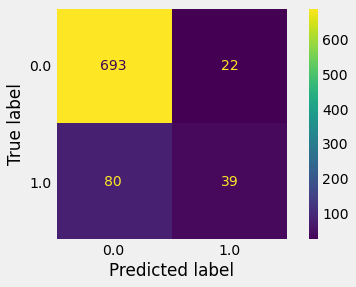

In [28]:

plot_confusion_matrix(logreg, X_test_scaled, y_test)
plt.grid(False)

In [29]:
y_preds_lr = logreg.predict(X_test_scaled)

In [30]:
def evaluation(y_true, y_pred):
    """A simple function to print evaluation metrics of a model"""
    print(f"The model has an accuracy score of {accuracy_score(y_true, y_pred):.2%}")
    print("-----------------------------------------------")
    print(f"The model's recall rate is {recall_score(y_true, y_pred):.2%}")
    print("-----------------------------------------------")
    print(f"The model's precision is {precision_score(y_true, y_pred):.2%}")
    print("-----------------------------------------------")
    print(f"The model's f1_score is {f1_score(y_true, y_pred):.2%}")
    print("-----------------------------------------------")

In [31]:
evaluation(y_test, y_preds_lr)

The model has an accuracy score of 87.77%
-----------------------------------------------
The model's recall rate is 32.77%
-----------------------------------------------
The model's precision is 63.93%
-----------------------------------------------
The model's f1_score is 43.33%
-----------------------------------------------


The model above didn't perform quite well to my expectation as it is only able to identify about 34% of the churned customers. Very low!

In [32]:
# Creatig a pipeline
#from sklearn.pipeline import Pipeline, FeatureUnion#
#from imblearn.pipeline import make_pipeline
#from sklearn.compose import ColumnTransformer

#makepipe = make_pipeline(SMOTE())
#binary_encoder = ColumnTransformer([("oe", OrdinalEncoder(), ["international plan",#
#                                                             "voice mail plan"])], remainder="drop")

#ohe_encoder = ColumnTransformer([("ohe", OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore"),
 #                                 ["state", "charges level"])], remainder="drop")
#feature_union = FeatureUnion([("binary", binary_encoder),
#                              ("ohe_encoded", ohe_encoder)])
#pipeline = Pipeline([("feature_union", feature_union),
#                    ("ss", StandardScaler())
 #                    ])
#pipe = Pipeline([("pipe", pipeline),
 #               ("makepipe", makepipe),
#               ("logreg", LogisticRegression(fit_intercept=False, C=1e16, solver="liblinear"))])



#### Decision trees

from the above scores i'll try out a different classification algorithm - Decision trees and look at it performance

In [33]:
# Fitting a DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy", random_state=20)
dt.fit(X_train_scaled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', random_state=20)

In [34]:
score_dt = cross_val_score(dt, X_train_scaled, y_train_resampled, cv=5).mean()
print(f"The decision tree has an average score of {score_dt:.2%}")

The decision tree has an average score of 92.88%


* From this we can see that this is an improvement from our loogistic regression model by around 3%

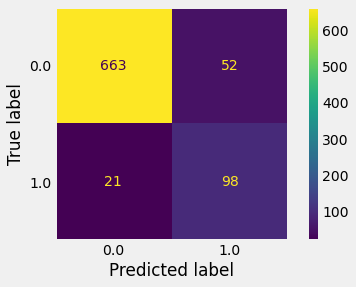

In [35]:
# Plotting a confusion matrix
plot_confusion_matrix(dt, X_test_scaled, y_test)
plt.grid(False)

In [36]:
y_preds_dt = dt.predict(X_test_scaled)
evaluation(y_test, y_preds_dt)

The model has an accuracy score of 91.25%
-----------------------------------------------
The model's recall rate is 82.35%
-----------------------------------------------
The model's precision is 65.33%
-----------------------------------------------
The model's f1_score is 72.86%
-----------------------------------------------


The above model is better compared to the logistic regression as we can see a great improvement in the recall score as now this is able to identify 82% of the churned customers but also again the precision is abit low.

#### K Nearest neighbors

In [37]:
# Fitting a kneighbors classifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train_resampled)

KNeighborsClassifier()

In [38]:
score_knn = cross_val_score(knn, X_train_scaled, y_train_resampled, cv=5).mean()
print(f"KNN Classifier has an average score of {score_knn:.2%}")

KNN Classifier has an average score of 90.35%


* The above average score is not much different from the logistic regression, so it seems decision trees has done better compared to these two.

In [39]:
evaluation(y_test, knn.predict(X_test_scaled))

The model has an accuracy score of 85.25%
-----------------------------------------------
The model's recall rate is 10.92%
-----------------------------------------------
The model's precision is 43.33%
-----------------------------------------------
The model's f1_score is 17.45%
-----------------------------------------------


* From the above results we note that the model performed even poorly compared to logistic regression as it was only able to identify 11% of the churned customers.

#### Random Forests

* Decision Trees algorithm seemed to perform better and so i'll fit in a random forests algorithm, to have an ensemble of decision trees to see if we can improve on the decision trees.

In [40]:
#Fitting a RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=20)
rf_clf.fit(X_train_scaled, y_train_resampled)

RandomForestClassifier(random_state=20)

In [41]:
score_rf = cross_val_score(rf_clf, X_train_scaled, y_train_resampled, cv=5).mean()
print(f"The decision tree has an average score of {score_rf:.2%}")

The decision tree has an average score of 96.16%


* We can see that the randomForests made some improvement compared to decision trees of about 3%.

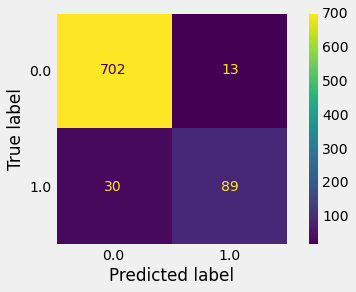

In [42]:
plot_confusion_matrix(rf_clf, X_test_scaled, y_test)
plt.grid(False)

In [43]:
y_preds_rf = rf_clf.predict(X_test_scaled)
evaluation(y_test, y_preds_rf)

The model has an accuracy score of 94.84%
-----------------------------------------------
The model's recall rate is 74.79%
-----------------------------------------------
The model's precision is 87.25%
-----------------------------------------------
The model's f1_score is 80.54%
-----------------------------------------------


* We note a reduction in the recall rate but also an improvement in precision. Generally the model and can be tuned further to improve it.

#### XGBoost

In [44]:
from xgboost import XGBClassifier

xg_clf = XGBClassifier(random_state=20)
xg_clf.fit(X_train_scaled, y_train_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=20,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
cross_val_score(xg_clf, X_train_scaled, y_train_resampled, cv=5).mean()

0.9693208430913348

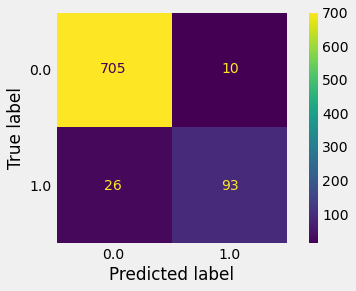

In [46]:
plot_confusion_matrix(xg_clf, X_test_scaled, y_test)
plt.grid(False)

In [47]:
y_preds_xg = xg_clf.predict(X_test_scaled)
evaluation(y_test, y_preds_xg)

The model has an accuracy score of 95.68%
-----------------------------------------------
The model's recall rate is 78.15%
-----------------------------------------------
The model's precision is 90.29%
-----------------------------------------------
The model's f1_score is 83.78%
-----------------------------------------------


### Final Model Evaluation

From the models fitted above we see that RandomForestClassifier and XGBoostClassifier are our top models having the highest scores compared to other models.

I'll then do some tuning in the two models to see which will be better as am looking for a model which will manage to classify a higher percentage of the churned customers but also having a relatively high precision.

##### tuning RandomForestClassifier

In [48]:
# Setting parameters to tune
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 1, 2, 4, 6, 8, 10],
    "min_samples_split": [2, 3, 4, 5, 8, 10],
    "min_samples_leaf": [1, 2, 3, 5, 10],
    "random_state": [20]
}

In [49]:
# Fitting GridSearchCV
gs_rf_clf = GridSearchCV(rf_clf, param_grid, cv=3)
gs_rf_clf.fit(X_train_scaled, y_train_resampled)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=20),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 3, 5, 10],
                         'min_samples_split': [2, 3, 4, 5, 8, 10],
                         'random_state': [20]})

In [50]:
#Evaluating the model
evaluation(y_test, gs_rf_clf.predict(X_test_scaled))

The model has an accuracy score of 95.08%
-----------------------------------------------
The model's recall rate is 74.79%
-----------------------------------------------
The model's precision is 89.00%
-----------------------------------------------
The model's f1_score is 81.28%
-----------------------------------------------


In [51]:
#Getting the best parameters
gs_rf_clf.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 20}

##### tuning XGBoostClassifier

In [52]:
#Setting the parameters to tune
param_grid = {
    "learning_rate": [0.3, 0.4, 0.5],
    "max_depth": [None, 2, 5, 6, 7, 10],
    "min_child_weight": [1, 2],
    "n_jobs": [0, 1],
    "subsample": [0.5, 0.7, 1],
    "random_state": [20]
}

In [53]:
#Fitting GridSearchCV
gs_xg_clf = GridSearchCV(xg_clf, param_grid, cv=3)
gs_xg_clf.fit(X_train_scaled, y_train_resampled)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=20,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
        

In [54]:
# The average score for the XGBClassifier
#cross_val_score(gs_xg_clf, X_train_scaled, y_train_resampled, cv=5)
#array([0.92388759, 0.9824356 , 0.97540984, 0.97892272, 0.9765808 ])


In [55]:
#Evaluating the model
evaluation(y_test, gs_xg_clf.predict(X_test_scaled))

The model has an accuracy score of 95.56%
-----------------------------------------------
The model's recall rate is 78.99%
-----------------------------------------------
The model's precision is 88.68%
-----------------------------------------------
The model's f1_score is 83.56%
-----------------------------------------------


In [56]:
# Getting the best parameters
gs_xg_clf.best_params_

{'learning_rate': 0.5,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_jobs': 0,
 'random_state': 20,
 'subsample': 1}

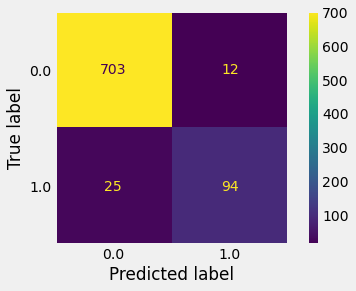

In [57]:
#Plotting a confusion matrix
plot_confusion_matrix(gs_xg_clf, X_test_scaled, y_test)
plt.grid(False)

Random Forest AUC: 0.8662572721396251
XGBoost AUC:  0.8865663748016688


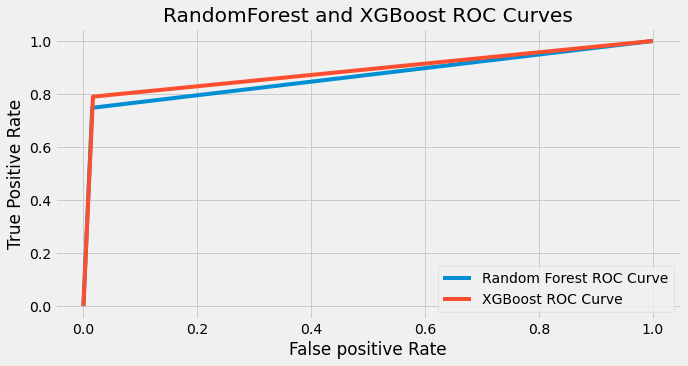

In [58]:
#Plotting ROC Curves
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, gs_rf_clf.predict(X_test_scaled))
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test, gs_xg_clf.predict(X_test_scaled))

plt.figure(figsize=(10,5))
plt.plot(fpr_rf, tpr_rf, label="Random Forest ROC Curve")
plt.plot(fpr_xg, tpr_xg, label="XGBoost ROC Curve")
plt.xlabel("False positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RandomForest and XGBoost ROC Curves")
plt.legend();

print("Random Forest AUC:", auc(fpr_rf, tpr_rf))
print("XGBoost AUC: ", auc(fpr_xg, tpr_xg))

### Conclusion

After tuning the models I settled with the tuned XGBClassifier as it improved on the recall rate as the main goal is being able to identify the people likely to churn even if it means having more false positives  which won't affect much as we'll still be remarketing to our customers.

The ```optimal values``` found after tuning are:

{'learning_rate': 0.5,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_jobs': 0,
 'random_state': 20,
 'subsample': 1}
 
 The model has an accuracy of 96%, was able to correctly classify 79% of the churned customers and has a precision of 89% meaning that in every prediction there is a 0.89 probability that it's true.

 Also the model had an auc score of 0.89 making it the better model compared to the RandomClassifier.